<a href="https://colab.research.google.com/github/YongHeeJang/AI-Dev/blob/main/scikit_learn_practice(Supervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [32]:
from sklearn.datasets import load_boston
boston = load_boston()

In [33]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
# scikit learn에서 불러온 dataset은 numpy형태로 데이터를 저장하고 있다.
data =boston.data
label = boston.target
columns = boston.feature_names

In [35]:
data = pd.DataFrame(data, columns=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
data.shape

(506, 13)

In [37]:
# train & test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=2022) 

In [66]:
# scikit learn에서는 데이터를 학습시키기 위해서는 2차원 형식의 배열만 인식한다.
# 그래서 X_train['RM']에서 value를 받아오고 2차원 형식으로 reshape해준다.
# -1, 1의 비밀을 이해해야 함
# (1,n) 배열의 1차원 numpy data를 (-1,1)로 reshape해주면, 열 1개로 구성된 2차원 numpy data로 변환할 수 있다.
X_train['RM'].values.reshape(-1,1)[:5]

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

In [ ]:
# 1차원의 numpy array data를 2차원으로 reshape 하지 않고, DataFrame 형태로 변환해서 model 학습에 fit해줘도 된다.
train_RM = X_train.RM

In [39]:
# Simple Linear Regression : 하나의 feature로 model을 학습하고 예측
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [60]:
# X_train data 중 Room featrue만을 이용하여 학습 
# 룸의 갯수만 사용하여 학습
train_rm = pd.DataFrame(X_train.RM)
sim_lr.fit(train_rm ,y_train)
# sim_lr.fit(X_train['RM'].values.reshape((-1,1)) ,y_train)

LinearRegression()

In [67]:
# 룸의 갯수만 사용하여 예측
test_rm = pd.DataFrame(X_test.RM)
y_pred = sim_lr.predict(test_rm)
# y_pred = sim_lr.predict(X_test['RM'].values.reshape((-1,1)))

In [62]:
# 결과 살펴보기
# regression의 모델 평가지표는 RMSE 말고도, MAE, MSE, R^2 등이 있다.
# sklearn.metrics 안에서 다양한 평가지표를 불러올 수 있다.

from sklearn.metrics import r2_score # R^2
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_squared_log_error # RMSE
print('단순 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred))) # {:.4f} 는 전체 데이터 중(:), 소숫점 4째자리까지 입력()받겠다는 formating 문자이다.

# 모델의 평가결과 R^2 값이 0.2121이 나온 것은 매우 형편없는 값이다. room의 갯수만으로 모델을 학습시키고 결과를 예측하기에는 충분하지 않다고 보인다.

단순 선형 회귀, R2: 0.2121


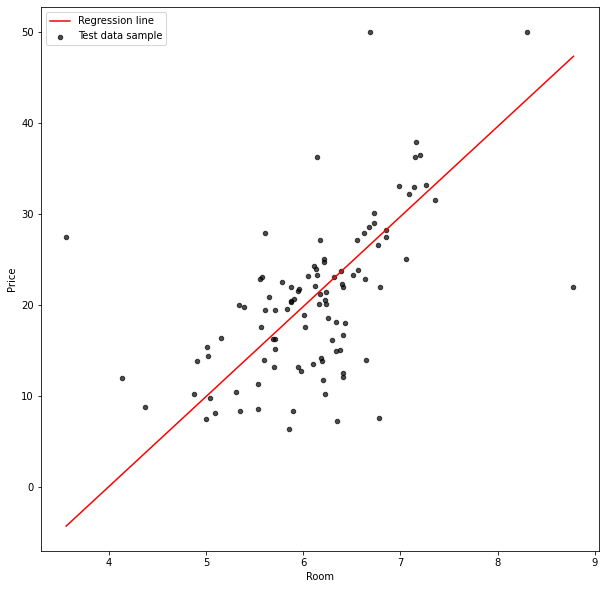

In [94]:
plt.figure(figsize=(10,10))
plt.xlabel('Room')
plt.ylabel('Price')


plt.scatter(X_test['RM'], y_test, s=20, c='black', alpha=0.7)
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line', 'Test data sample'], loc='best') # loc = 'upper left', 'center right', 'lower center' 등 가능

In [44]:
# Multiple Linear Regression : train data의 모든 feature를 사용하여 model 학습
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)

LinearRegression()

In [45]:
# 모든 feature를 사용하여 결과를 예측
y_pred = mul_lr.predict(X_test)

In [46]:
print('다중 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))
# 하나의 feature만을 사용했을 때보다 3배 가량 높은 예측력을 보임. but, 이정도의 예측력으로는 부족

다중 선형 회귀, R2: 0.6226


In [47]:
x = np.array([10,20,30])
x.shape

(3,)

In [48]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=2) # max_depth가 너무 깊어지면, overfitting의 가능성이 높아진다. max_depth를 조절하면서 model score를 비교하고, 최적의 max_depth를 찾는다.

In [49]:
dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)

DecisionTreeRegressor(max_depth=2)

In [50]:
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [51]:
print('단순 결정 트리 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: 0.3547


In [52]:
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [96]:
# max_depth값을 바꿔가면서 모델을 학습시키고 model score를 비교하여, 최적의 max_depth를 찾는다. 
best_depth = 0
best_r2 = 0

for depth in arr:
  dt_regr = DecisionTreeRegressor(max_depth=depth)
  dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)
  y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))
  
  temp_r2 = r2_score(y_test, y_pred)
  print('\n단순 결정 트리 회귀 depth={} R2: {:.4f}'.format(depth, temp_r2))

  if best_r2 < temp_r2:
    best_depth = depth
    best_r2 = temp_r2

print('\n최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))




단순 결정 트리 회귀 depth=1 R2: 0.2459

단순 결정 트리 회귀 depth=2 R2: 0.3547

단순 결정 트리 회귀 depth=3 R2: 0.3931

단순 결정 트리 회귀 depth=4 R2: 0.3816

단순 결정 트리 회귀 depth=5 R2: 0.3247

단순 결정 트리 회귀 depth=6 R2: 0.3474

단순 결정 트리 회귀 depth=7 R2: 0.3164

단순 결정 트리 회귀 depth=8 R2: 0.3368

단순 결정 트리 회귀 depth=9 R2: 0.3098

단순 결정 트리 회귀 depth=10 R2: 0.2579

최적의 결과는 depth=3 r2=0.3931


In [54]:
dt_regr = DecisionTreeRegressor(max_depth=8)
dt_regr.fit(X_train, y_train)

y_pred = dt_regr.predict(X_test)
print('다중 결정 트리 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 R2: 0.7392


In [55]:
# Support Vector machine Regressor 
from sklearn.svm import SVR
svm_regr = SVR(C=5)

svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1))

print('단순 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test,y_pred)))

단순 서포트 벡터 머신 회귀 R2: 0.4049


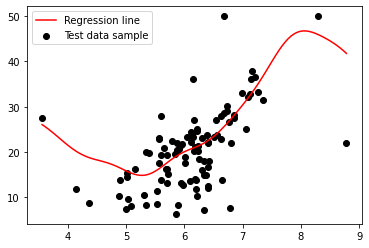

In [56]:
# 결과의 시각화
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 100)
line_y = svm_regr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

In [57]:
svm_regr = SVR(C=20)
svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)
print('다중 서포트 벡터 머신 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

다중 서포트 벡터 머신 회귀, R2 : 0.4234
